In [6]:
import numpy as np
import preProcessRPCA as preprocess
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


""" Perform Robust Principle Component Analysis:
    -Input = [EEG,params]
           EEG = EEG Data (must include)
           lam = Lamda paramter for RPCA (default = 1/(sqrt(# of Colunms))
           tol = Tolerance (defalut = 1e-7) RPCA param
           maxIter = Maximum Iterations (deafult = 1000)
    
    -Output = [Data, Noise]
            Data = Corrected Data
            Noise = Noise removed from the data
            Original EEG = Data + Noise        
    
    -Summary = Performs a Robust Principal Component Analysis on the EEG data with
            the specified parameters: Lamda, Tolerance, and Maximum number of Iterations.
            The function outputs the EEG data with the noise removed as well as the nosie
            that was removed.
"""

def performRPCA(EEG, lam=-1, tol=1e-7, maxIter=1000):
    #Find lamda if not provided using the Automagic algorithim
    col = EEG.shape;
    if (lam == -1): #if no input lamda, calculate its value
        lam = 1 / np.sqrt(col[0]);
        
    #Perform Robust Principal Component Analysis
    data, error = preprocess.rpca(EEG,lam,tol,maxIter);
    return data, error;

In [2]:
dat = np.array([[-21.1425781250000, -23.6816406250000,-21.4843750000000],
[-21.9238281250000, -23.9257812500000, -24.3164062500000],
[-15.6250000000000,-19.7265625000000,-18.8476562500000],
[-16.6992187500000,-13.7207031250000,-20.3613281250000],
[-19.3359375000000,-17.6269531250000,-20.4101562500000],
[0.0976562500000000,6.73828125000000,2.88085937500000],
[-12.8906250000000,-6.68945312500000,-10.8886718750000],
[-18.9453125000000,-12.4511718750000,-15.5273437500000],
[-21.8261718750000,-9.13085937500000,-16.1621093750000],
[-19.6777343750000,-8.83789062500000,-11.5722656250000],
[-31.7382812500000,-19.5312500000000,-24.9023437500000],
[-27.0507812500000,-16.4062500000000,-18.9453125000000],
[-26.2207031250000,-11.1816406250000,-16.8945312500000],
[-16.0644531250000,-4.29687500000000,-6.68945312500000],
[-16.2597656250000,-5.71289062500000,-5.32226562500000],
[-9.81445312500000,4.88281250000000,1.51367187500000],
[-15.3320312500000,1.17187500000000,-4.73632812500000],
[-4.93164062500000,9.57031250000000,5.17578125000000],
[-1.46484375000000,11.6210937500000,7.08007812500000],
[-13.0859375000000,-1.07421875000000,-8.44726562500000]])

/Users/raphaelbechtold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until


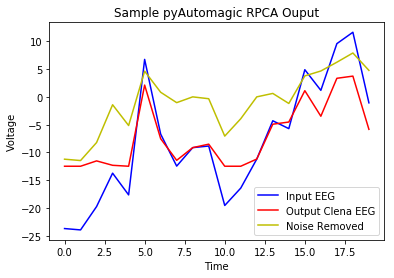

In [4]:
A,E = performRPCA(dat)
plt.plot(dat[::,1],'b')
plt.hold(True)
plt.plot(A[::,1],'r');
plt.plot(E[::,1],'y');
plt.xlabel('Time');
plt.ylabel('Voltage');
plt.title('Sample pyAutomagic RPCA Ouput');
plt.legend(['Input EEG','Output Clena EEG', 'Noise Removed']);

In [35]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(dat)
approximation = pca.inverse_transform(principalComponents)

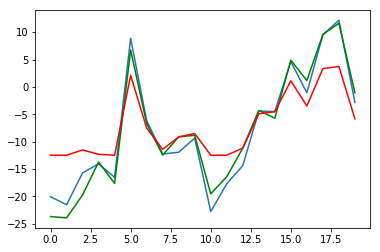

In [36]:
plt.plot(approximation[::,1])
plt.plot(dat[::,1],'g')
#plt.plot(E[::,1],'y');
plt.plot(A[::,1],'r');